# Juan Pablo Pulido Angel
## Demographic Data Analyzer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("adult.data.csv",header=None, names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### There are question marks in the database, then we have to change the question marks to nans

In [4]:
df.replace(' ?', pd.NA, inplace=True)

In [5]:
df.isnull().sum() # We visulize the number of nans for each column

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [6]:
df.fillna(" No information", inplace=True)  #We replace the nans with "No information"
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

### 1. How many people of each race are represented in this dataset?

In [7]:
df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

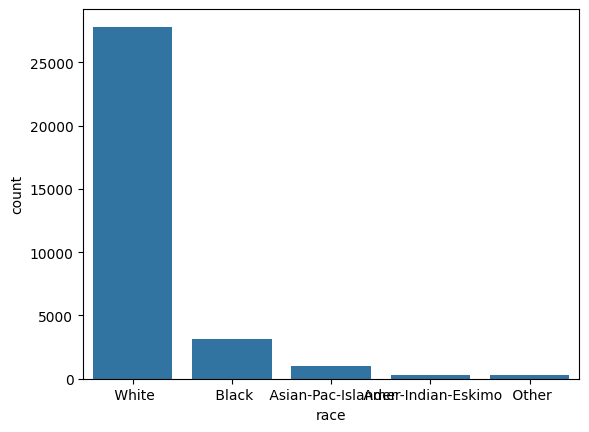

In [8]:
sns.countplot(x=df["race"])
plt.show()

In [26]:
value_race = df['race'].value_counts()
print("Number of each race:\n", value_race) 

Number of each race:
 race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64


### 2. What is the average age of men?

In [11]:

df_male = df[df['sex'] == ' Male']  #We select the male sex
Mean_age_male = df_male['age'].mean() 
Mean_age_male=round(Mean_age_male,0)
print(f"The avarage age of men is {Mean_age_male} years old ")

The avarage age of men is 39.0 years old 


### 3. What is the percentage of people who have a Bachelor's degree?

In [12]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [13]:
df_bachelors=df[df["education"] == " Bachelors"]
percentage_bachelors=(df_bachelors.shape[0]/df.shape[0])*100
percentage_bachelors=round(percentage_bachelors,1)
print(f"The percentage of people who hold a bahelor's degree is: {percentage_bachelors}%")


The percentage of people who hold a bahelor's degree is: 16.4%


### 4. What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [16]:

df_advanced_education = df[(df["education"].isin([" Bachelors", " Masters", " Doctorate"])) & (df["salary"] ==" >50K")]
df_advanced=df[(df["education"].isin([" Bachelors", " Masters", " Doctorate"]))]
percentage_advanced_education=(df_advanced_education.shape[0]/df_advanced.shape[0])*100
percentage_advanced_education=round(percentage_advanced_education,1)
print(f"The percentage of people with advanced education and a salary of more than 50K is: {percentage_advanced_education}%")


The percentage of people with advanced education and a salary of more than 50K is: 46.5%


### 5. What percentage of people without advanced education make more than 50K?

In [18]:
df_without_advanced_education = df[(~df["education"].isin([" Bachelors", " Masters", " Doctorate"])) & (df["salary"] ==" >50K")]
df_without_advanced=df[(~df["education"].isin([" Bachelors", " Masters", " Doctorate"]))]
percentage_without_advanced_education=(df_without_advanced_education.shape[0]/df_without_advanced.shape[0])*100
percentage_without_advanced_education=round(percentage_without_advanced_education,1)
print(f"The percentage of people without advanced education and a salary of more than 50K is: {percentage_without_advanced_education}%")


The percentage of people without advanced education and a salary of more than 50K is: 17.4%


### 6. What is the minimum number of hours a person works per week?

In [19]:
min_hours_per_week=df["hours-per-week"].min()
print(f"The minimum number of hours that a person works per week is {min_hours_per_week}")

The minimum number of hours that a person works per week is 1


### 7. What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?

In [22]:
df_minimum_salary50=df[(df["hours-per-week"]==min_hours_per_week) & (df["salary"] ==" >50K")]
df_min_hour=df[df["hours-per-week"]==1]
percentage_min_salary50=(df_minimum_salary50.shape[0]/df_min_hour.shape[0])*100
percentage_min_salary50=round(percentage_min_salary50,2)
print(f"The percentage of people who working the minimun of hours per week and earning more than 50k is: {percentage_min_salary50}%")


The percentage of people who working the minimun of hours per week and earning more than 50k is: 10.0%


### 8. What country has the highest percentage of people that earn >50K and what is that percentage?

In [24]:
df_salary=df[df["salary"]==" >50K"]
countain_country=df_salary.groupby("native-country").size()
total_persons_country= df.groupby("native-country").size()
percentage_country=(countain_country/total_persons_country)*100
country_max_percentage=percentage_country.idxmax()
max_percentage=round(percentage_country.max(),1)
print(f"The country with the highest percentage of people that earn more than 50K is {country_max_percentage} with {max_percentage}%")


The country with the highest percentage of people that earn more than 50K is  Iran with 41.9%


### 9. Identify the most popular occupation for those who earn >50K in India.

In [25]:
df_india_salary=df[(df["native-country"]==" India") & (df["salary"] ==" >50K")]
countain_occupation=df_india_salary.groupby("occupation").size()
max_occupation=countain_occupation.idxmax()
print(f"The most popular occupation for those who earn more than 50K in India is {max_occupation} ")

The most popular occupation for those who earn more than 50K in India is  Prof-specialty 
